# Avocado Price Prediction: Data Understanding

## CRISP-DM Phase 2: Data Understanding

### Data Understanding
#### Data Sources:
- Avocado sales and price data from Kaggle (2015-2023) [link](https://www.kaggle.com/datasets/vakhariapujan/avocado-prices-and-sales-volume-2015-2023)
- Weather history from Meteostat API [link](https://dev.meteostat.net/api/)

#### Avocado Dataset Description

The dataset consists of historical weekly data on HASS Avocado prices and sales volume across multiple U.S. markets. It contains 45,019 observations with 11 columns. Below is a table describing each column:

| Column Name   | Description |
|--------------|------------|
| Date         | The date of the observation |
| year_number  | The year of observation |
| week_number  | The week number of the observation |
| AveragePrice | The average price of a single avocado |
| TotalVolume  | Total number of avocados sold |
| plu4046      | Total number of avocados with PLU 4046 sold |
| plu4225      | Total number of avocados with PLU 4225 sold |
| plu4770      | Total number of avocados with PLU 4770 sold |
| type         | Organic or Conventional |
| region       | The city or region of the observation |
| tavg         | Temperature average added by joining weather database |

This dataset can be used for various analytical and predictive modeling tasks, including price forecasting and trend analysis.

#### Data Collection Process:
- Retrieved weather data using a custom Python script (`getweatherdata.py`)
- Imported CSV files into SQL Server, joined them by region, and exported a combined dataset



<a id='1'></a>
## 1. Setup and Data Loading

In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

# Load the dataset
df = pd.read_csv('../avocado2015to2022withweather.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()
print("\nFirst few rows:")
df.head()

Dataset Shape: (45019, 11)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45019 entries, 0 to 45018
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          45019 non-null  object 
 1   year_number   45019 non-null  int64  
 2   week_number   45019 non-null  int64  
 3   AveragePrice  45019 non-null  float64
 4   TotalVolume   45019 non-null  float64
 5   plu4046       45019 non-null  float64
 6   plu4225       45019 non-null  float64
 7   plu4770       45019 non-null  float64
 8   type          45019 non-null  object 
 9   region        45019 non-null  object 
 10  tavg          45019 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.8+ MB

First few rows:


,Date,year_number,week_number,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,type,region,tavg
0,2015-01-04,2015,2,0.74,1086363.97,612795.80,374420.68,9817.28,conventional,DallasFtWorth,3.4
1,2015-01-04,2015,2,1.12,17296.85,14569.66,1868.59,0.00,organic,PhoenixTucson,8.4
2,2015-01-04,2015,2,1.00,84612.39,26607.29,44341.92,3660.64,conventional,Spokane,-4.3
3,2015-01-04,2015,2,1.35,9895.96,4634.70,1647.92,0.00,organic,DallasFtWorth,3.4
4,2015-01-04,2015,2,0.65,1048062.16,770635.37,178418.32,6509.41,conventional,PhoenixTucson,8.4


<a id='2'></a>
## 2. Initial Data Exploration

In [38]:
# Basic statistical description
print("Statistical Summary:")
df.describe()

# Check unique values in categorical columns
print("\nUnique values in 'type':", df['type'].unique())
print("Number of unique regions:", df['region'].nunique())
print("Date range:", df['Date'].min(), "to", df['Date'].max())

Statistical Summary:

Unique values in 'type': ['conventional' 'organic']
Number of unique regions: 56
Date range: 2015-01-04 to 2022-12-25


<a id='3'></a>
## 3. Data Quality Assessment

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

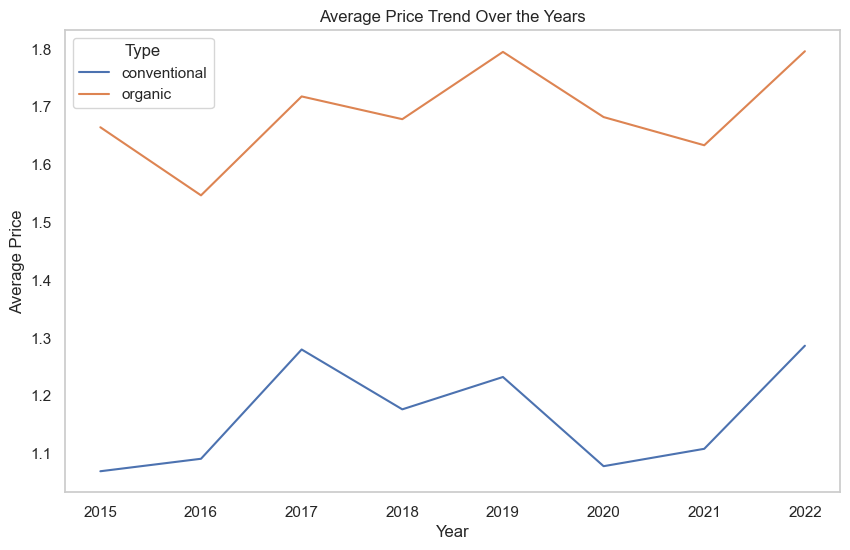

In [40]:
#Plot average price trends over years
df.groupby(['year_number', 'type'])['AveragePrice'].mean().unstack().plot(kind='line', figsize=(10, 6))
plt.title('Average Price Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title='Type')
plt.grid()
plt.show()

Text(0, 0.5, '')

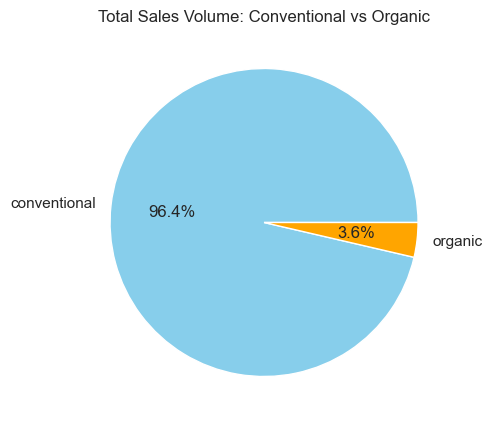

In [41]:
# Group by 'type' and sum up 'TotalVolume'
total_volume = df.groupby('type')['TotalVolume'].sum()

# Plot as a pie chart
total_volume.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'], figsize=(5, 5))
plt.title('Total Sales Volume: Conventional vs Organic')
plt.ylabel('')  # Remove y-axis label for better appearance

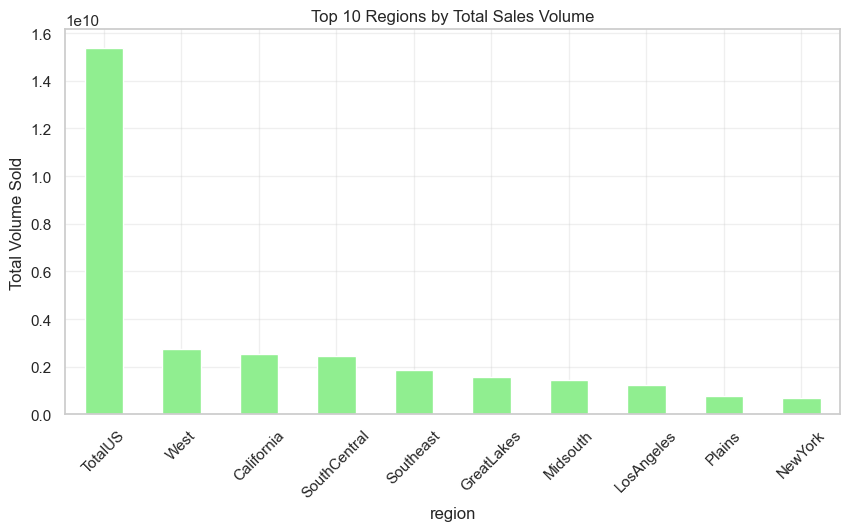

In [42]:
top_regions = df.groupby('region')['TotalVolume'].sum().sort_values(ascending=False).head(10)
top_regions.plot(kind='bar', color='lightgreen', figsize=(10, 5))
plt.title('Top 10 Regions by Total Sales Volume')
plt.ylabel('Total Volume Sold')
plt.xticks(rotation=45)
plt.show()


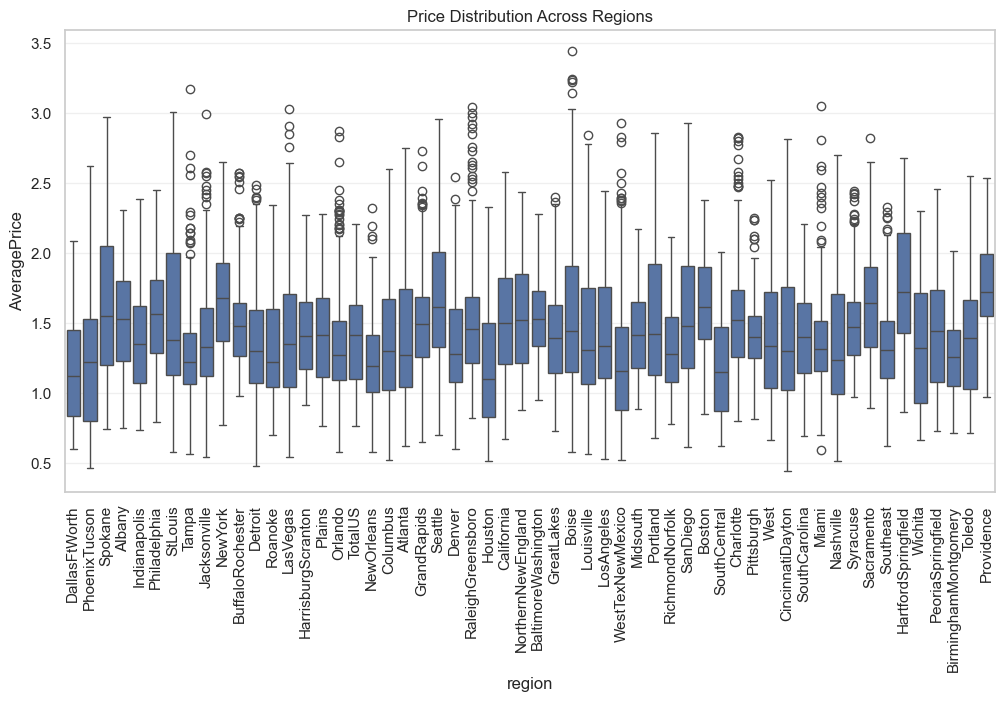

In [43]:
# here you can see the outliers clearly
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='region', y='AveragePrice')
plt.title('Price Distribution Across Regions')
plt.xticks(rotation=90)
plt.show()

In [ ]:
plu_sales = df[['plu4046', 'plu4225', 'plu4770']].sum()
plu_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(5, 5))
plt.title('Sales Distribution by PLU Code')
plt.ylabel('')
plt.show()

In [ ]:
# Set the style
sns.set(style="whitegrid")
#Plot average price over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='AveragePrice', hue='type', data=df)
plt.title('Average Price of Avocados Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Group by year and sum the total volume
yearly_volume = df.groupby('year_number')['TotalVolume'].sum().reset_index()
# Plot total volume by year
plt.figure(figsize=(10, 6))
sns.barplot(x='year_number', y='TotalVolume', data=yearly_volume)
plt.title('Total Volume of Avocados Sold by Year')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.show()

In [ ]:
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Extract the 'Month' from the 'Date'
df['Month'] = df['Date'].dt.month
# Group data by Year and Month, then calculate the average price
monthly_avg_price = df.groupby(['year_number', 'Month'])['AveragePrice'].mean().unstack(level=0)
# # Plotting
plt.figure(figsize=(12, 6))
monthly_avg_price.plot(ax=plt.gca(), marker='o')
plt.title("Average Price of Avocados by Month Across Years", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"], rotation=45)
plt.legend(title="Year", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
# Create a 'Season' column based on the month
df['Season'] = df['Date'].dt.month % 12 // 3
df['Season'] = df['Season'].map({0: 'Winter', 1: 'Spring', 2: 'Summer', 3: 'Fall'})
# Group data by Season, Type, and calculate the average price
seasonal_avg_price = df.groupby(['Season', 'type'])['AveragePrice'].mean().reset_index()
# Sort Seasons for proper order in the plot
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_avg_price['Season'] = pd.Categorical(seasonal_avg_price['Season'], categories=season_order, ordered=True)
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_avg_price, x='Season', y='AveragePrice', hue='type', palette='Set2')
plt.title('Seasonal Changes in Average Price (Organic vs Conventional)', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Price (€)', fontsize=12)
plt.legend(title='Avocado Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<a id='4'></a>
## 4. Exploratory Data Analysis

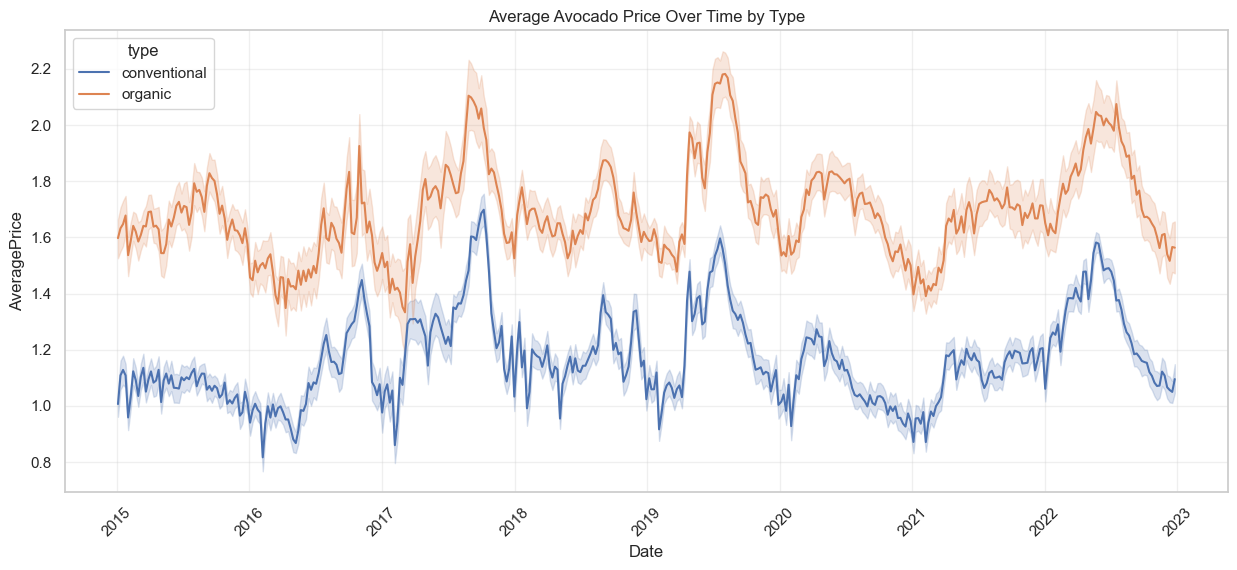

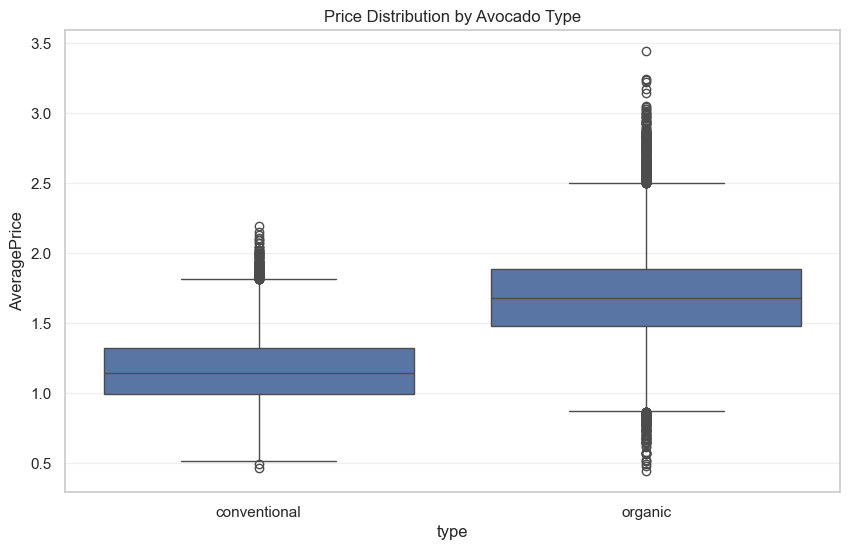

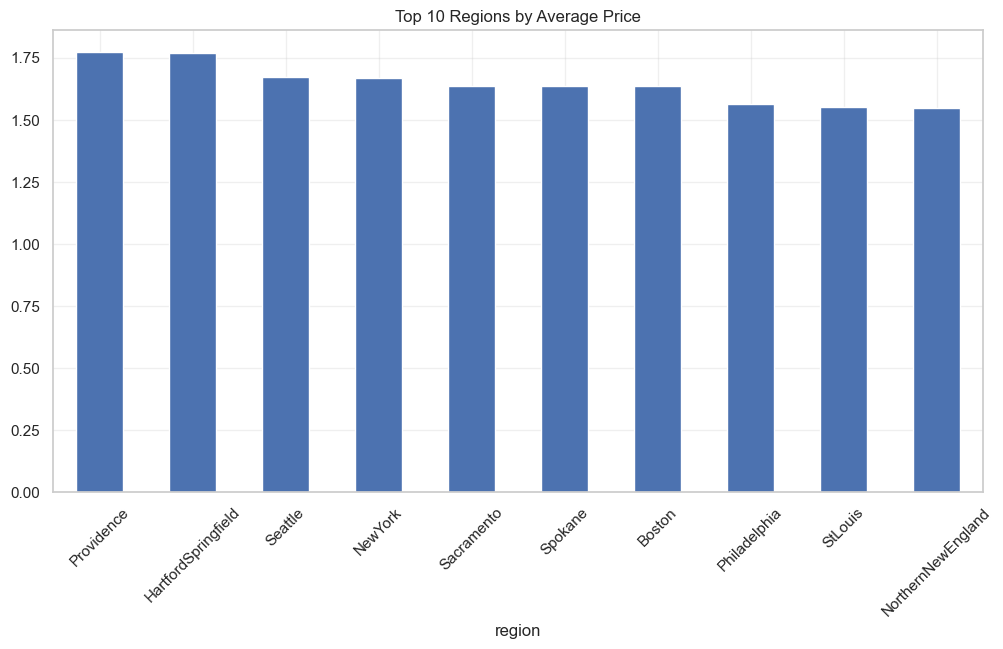

In [44]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Time series plot of average price
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='Date', y='AveragePrice', hue='type')
plt.title('Average Avocado Price Over Time by Type')
plt.xticks(rotation=45)
plt.show()

# Price distribution by type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='type', y='AveragePrice')
plt.title('Price Distribution by Avocado Type')
plt.show()

# Top 10 regions by average price
plt.figure(figsize=(12, 6))
df.groupby('region')['AveragePrice'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Regions by Average Price')
plt.xticks(rotation=45)
plt.show()